In [7]:
# ML demo for decision Tree ( with fruit dataset from Kaggle )

In [8]:
# https://www.kaggle.com/datasets/wuxi5791/fruitcsv/

#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("muratkokludataset/date-fruit-datasets")
#path = kagglehub.dataset_download("wuxi5791/fruit.csv")

#print("Path to dataset files:", path)

In [9]:
import sys
import os

In [10]:
# importing python module named numpy
import numpy as np

In [11]:
# importing python module named pandas
import pandas as pd

In [12]:
import inspect
import matplotlib as plt

In [13]:
fruit_data = pd.read_csv('fruit_data.csv')
print(fruit_data.head())

   fruit_label fruit_name  fruit_subtype  mass  width  height  color_score
0            1      apple   granny_smith   192    8.4     7.3         0.55
1            1      apple   granny_smith   180    8.0     6.8         0.59
2            1      apple   granny_smith   176    7.4     7.2         0.60
3            2   mandarin       mandarin    86    6.2     4.7         0.80
4            2   mandarin       mandarin    84    6.0     4.6         0.79


In [14]:
print(fruit_data.count())

fruit_label      59
fruit_name       59
fruit_subtype    59
mass             59
width            59
height           59
color_score      59
dtype: int64


In [15]:
print(fruit_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB
None


In [16]:
print(fruit_data.describe())

       fruit_label        mass      width     height  color_score
count    59.000000   59.000000  59.000000  59.000000    59.000000
mean      2.542373  163.118644   7.105085   7.693220     0.762881
std       1.208048   55.018832   0.816938   1.361017     0.076857
min       1.000000   76.000000   5.800000   4.000000     0.550000
25%       1.000000  140.000000   6.600000   7.200000     0.720000
50%       3.000000  158.000000   7.200000   7.600000     0.750000
75%       4.000000  177.000000   7.500000   8.200000     0.810000
max       4.000000  362.000000   9.600000  10.500000     0.930000


In [17]:
# gewicht,breedte,kleur

X = fruit_data[['mass','width','color_score']]
y = fruit_data['fruit_name']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 2, test_size = 0.25 )

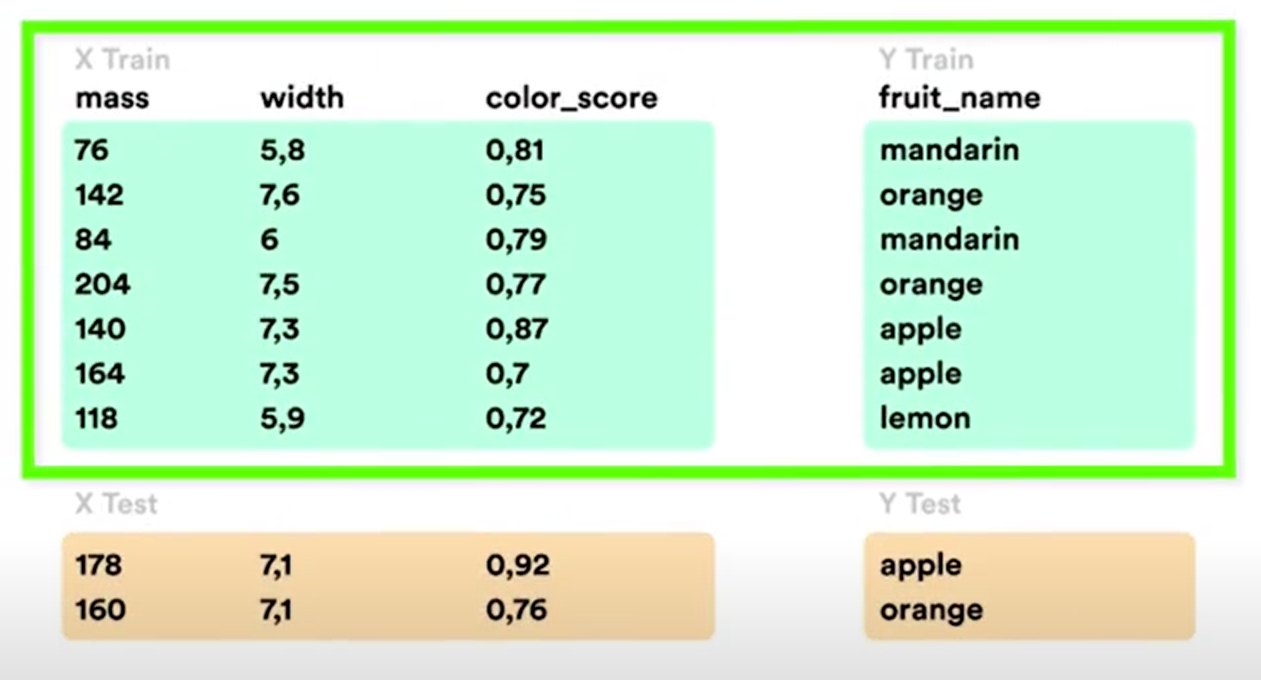

In [19]:
from IPython.display import Image
Image('fruit_X_y.PNG')

In [20]:
from sklearn import tree
algorithm = tree.DecisionTreeClassifier().fit(X_train, y_train)

In [21]:
true_fruit = y_test
predicted_fruit = algorithm.predict(X_test)

In [22]:
predictions = pd.DataFrame({'true':true_fruit, 'predicted':predicted_fruit})
print(predictions)

       true predicted
46    lemon     lemon
29   orange    orange
35   orange    orange
56    lemon     lemon
23    apple     apple
48    lemon     lemon
28   orange     lemon
0     apple     apple
30   orange    orange
1     apple     apple
54    lemon     lemon
53    lemon  mandarin
9     apple     apple
10    apple     apple
13    apple     lemon


In [23]:
print(predictions[predictions['true']!=predictions['predicted']])

       true predicted
28   orange     lemon
0     apple     apple
1     apple     apple
53    lemon  mandarin
13    apple     lemon


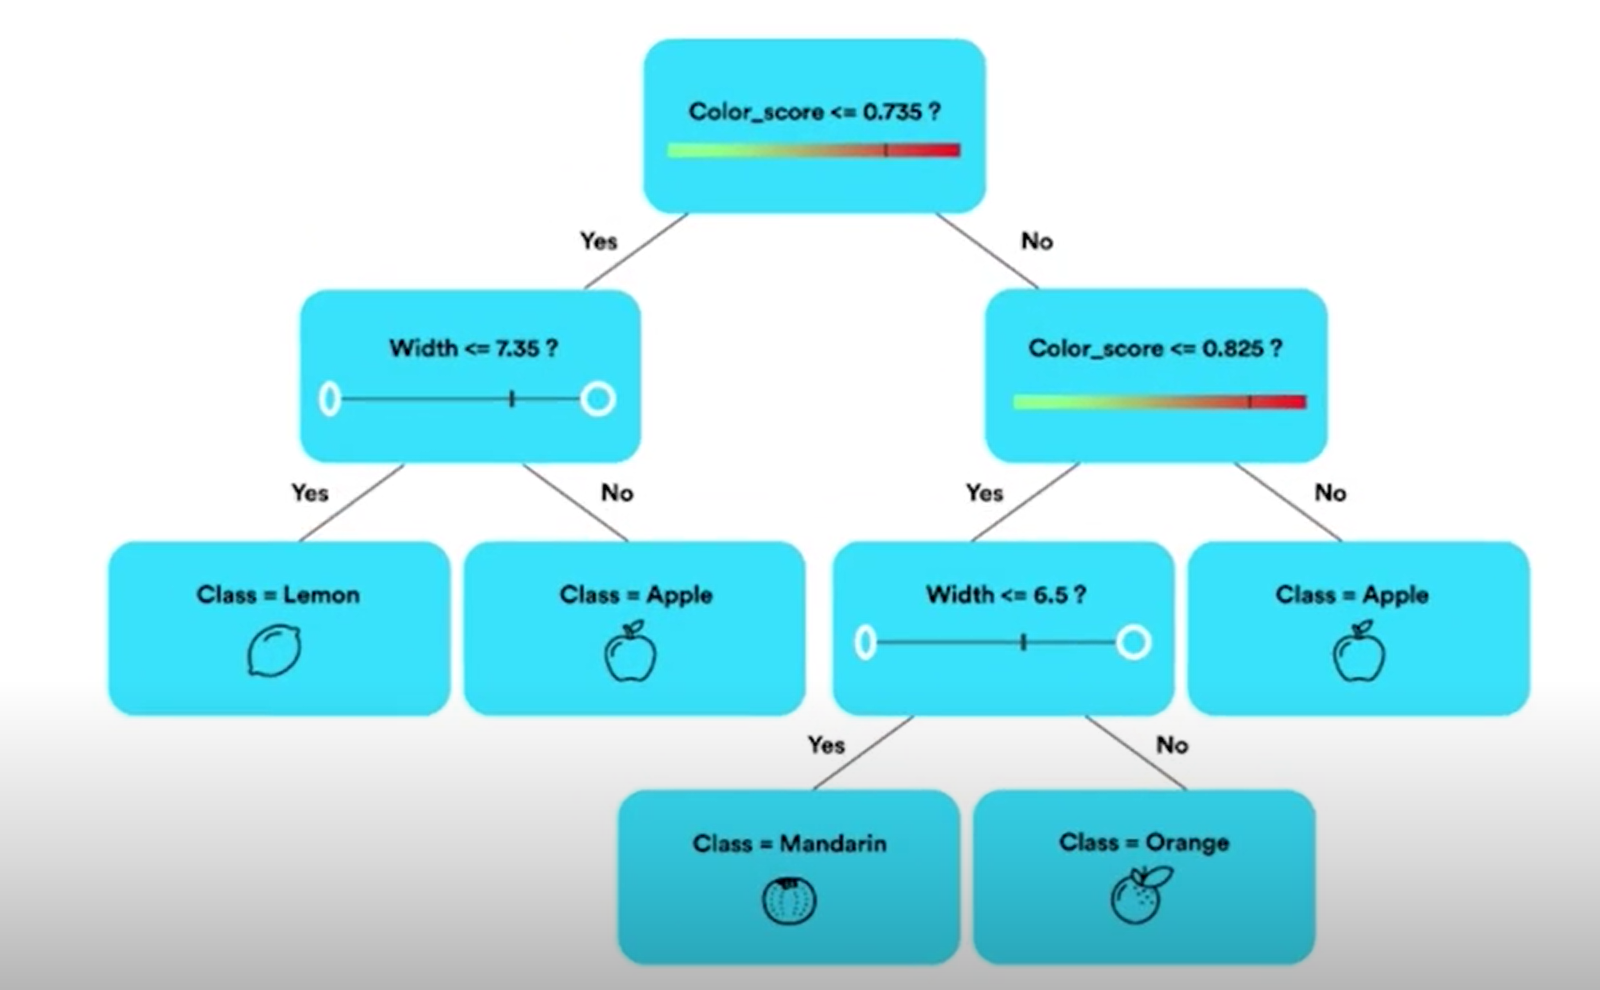

In [24]:
Image('fruit_Tree.PNG')

In [25]:
# 1. random sample test ( exact row from dataset above )

In [26]:
fruit_test = {
     'fruit_label': ['1']
    ,'fruit_name': ['apple']
    ,'fruit_subtype': ['granny_smith']
    ,'mass': [192]
    ,'width': [8.4]
    ,'height': [7.3]
    ,'color_score': [0.55]
}

In [27]:
df_test = pd.DataFrame(fruit_test)[['mass','width','color_score']]

In [28]:
print(df_test)

   mass  width  color_score
0   192    8.4         0.55


In [29]:
predicted_test = algorithm.predict(df_test)

In [30]:
print(predicted_test)

['apple']


In [31]:
# 2. random sample test ( small change in row from dataset above, width 5.4 instead of 8.4 )

In [32]:
fruit_test = {
     'fruit_label': ['1']
    ,'fruit_name': ['apple']
    ,'fruit_subtype': ['granny_smith']
    ,'mass': [192]
    ,'width': [5.4]
    ,'height': [7.3]
    ,'color_score': [0.55]
}

In [33]:
df_test = pd.DataFrame(fruit_test)[['mass','width','color_score']]

In [34]:
print(df_test)

   mass  width  color_score
0   192    5.4         0.55


In [35]:
predicted_test = algorithm.predict(df_test)

In [36]:
print(predicted_test)

['lemon']
